<a href="https://colab.research.google.com/github/iliasi/insurance-premium-prediction/blob/main/predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Predicting Medical Insurance Premium using Regression Analysis
Dataset Obtained from : https://www.kaggle.com/mirichoi0218/insurance

'''

In [ ]:
#This code section imports necessaring libraries and pakages
import numpy as np 
import pandas as pd 
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
# The code in this section is used to import the datasets into Colab
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
# This line of code imports the dataset in the notebook
df_ins = pd.read_csv("/content/insurance.csv")

In [ ]:
#This code line prints the first 5 rows of the dataset
df_ins.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# This line of code checks the dataframe for missing values
df_ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# This line of code drops the region column
df_ins = df_ins.drop(columns=['region'])

In [ ]:
# This line of code converts sex and smoker variable to numeric
df_ins['smoker'] = df_ins['smoker'].astype('category').cat.codes
df_ins['sex'] = df_ins['sex'].astype('category').cat.codes

In [ ]:
# This code line display a summary statistics of the dataset
df_ins.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [ ]:
#sns.pairplot(df_ins, kind="scatter", hue = "smoker" , markers=["o", "s"], palette="Set1")

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


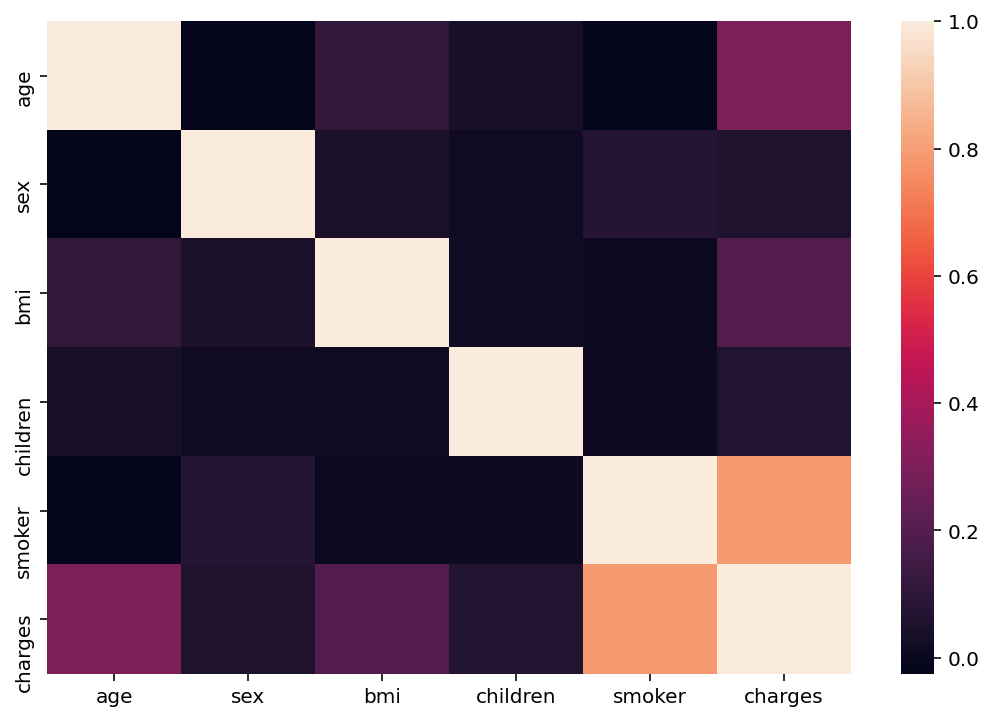

In [ ]:
# This code section computes the correlation between the variables
# and also plots the results
corr_matrix = df_ins.corr()
fig, ax = plt.subplots(figsize=(9,6)) 
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, ax=ax)
corr_matrix.style.background_gradient(cmap='coolwarm')

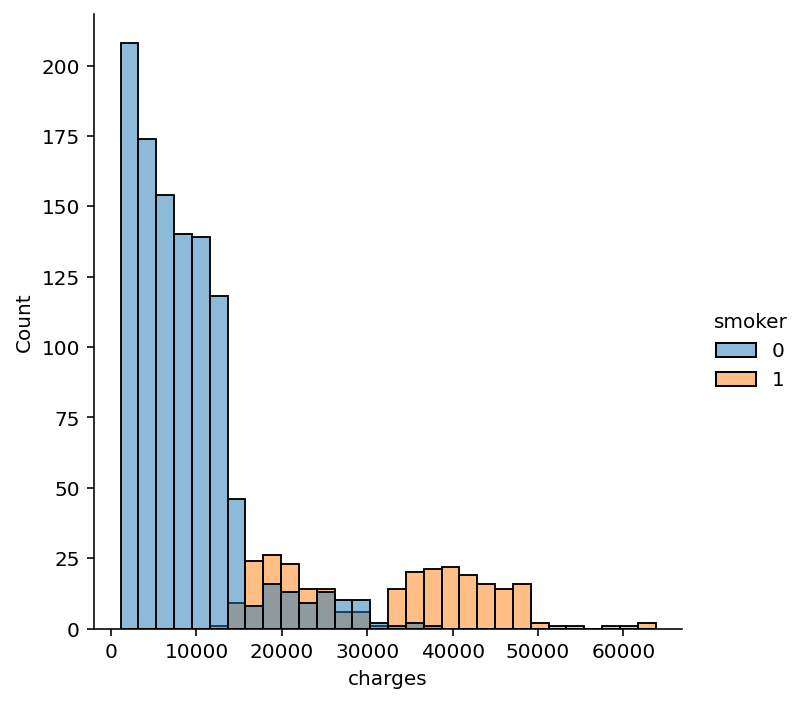

In [ ]:
# This line of code plots the distribution of charges amongst smoker
sns.displot(df_ins, x="charges", hue="smoker")

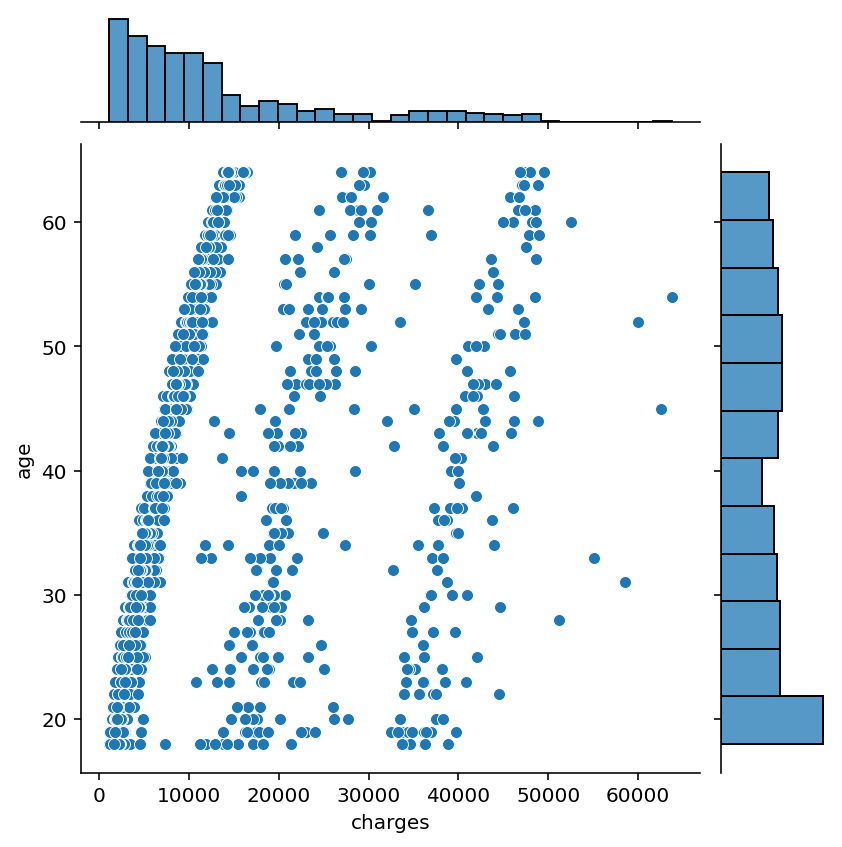

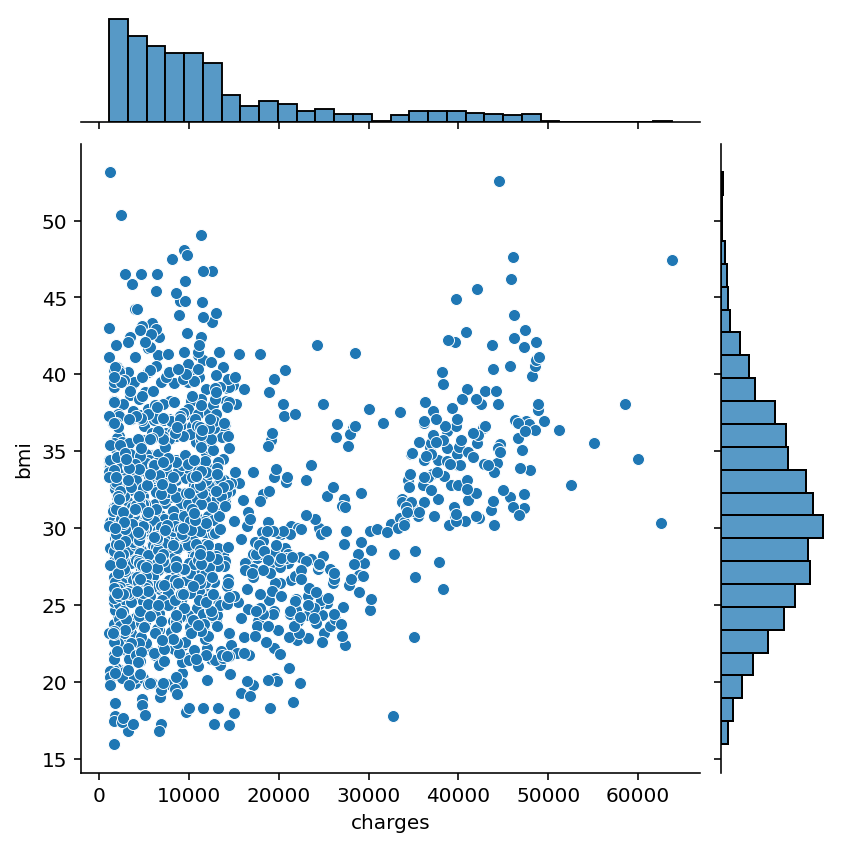

In [ ]:
# This line of code plots the joint plot of age and charges
# as well as bmi and charges
sns.jointplot(x=df_ins["charges"], y=df_ins["age"])
sns.jointplot(x=df_ins["charges"], y=df_ins["bmi"])
plt.show()

In [ ]:
# This line of code copy the dataframe df_ins into the new df_final
# also drop the sex and children variables
df_final = df_ins
df_final = df_final.drop(columns=['sex'])
df_final = df_final.drop(columns=['children'])

In [ ]:
# This line of code split the dataset into training and testing 
# 67% for training and 33% for testing
from sklearn.model_selection import train_test_split
X = df_final.drop(['charges'], axis = 1)
y = df_final.charges
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# This line of code fit the training data into the linear regression model
linear_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# This line of code fit the training data into the Random Forest Regression model
rForest_reg = RandomForestRegressor(n_estimators=20, max_depth=2, random_state=0)
rForest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# This line of code predicts the charges for the test dataset
# and stores the predictions into the linear_predictions variable
linear_predictions = linear_reg.predict(X_test)

In [ ]:
# This line of code predicts the charges for the test dataset
# and stores the predictions into the rF_predictions variable
rF_predictions = rForest_reg.predict(X_test)

In [ ]:
# This line of code evaluate the Linear Model's performance using R2 score
# and prints the score
score = r2_score(y_test, linear_predictions)
print("R^2 Score of Linear Regression ",score)

R^2 Score of Linear Regression  0.755540757797331


In [ ]:
# This line of code evaluate the Linear Model's performance using RMSE
# and prints the RMSE
mse_linear = mean_squared_error(y_test, linear_predictions)
rmse_linear = np.sqrt(mse_linear)
rmse_linear

5985.331697828509

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_linear = mean_absolute_error(y_test, linear_predictions)
mae_linear

4249.594582787519

In [ ]:
# This line of code evaluate the Random Forest Regressor Model's performance using R2 score
# and prints the score
score_rf = r2_score(y_test, rF_predictions)
print("R^2 Score of Random Forest model: ",score_rf)

R^2 Score of Random Forest model:  0.8341554081774152


In [ ]:
# This line of code evaluate the Random Forest Regressor Model's performance using RMSE
# and prints the RMSE
mse_rF = mean_squared_error(y_test, rF_predictions)
rmse_rF = np.sqrt(mse_rF)
rmse_rF

4929.872071713511

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_rf = mean_absolute_error(y_test, rF_predictions)
mae_rf

3150.7705440368436

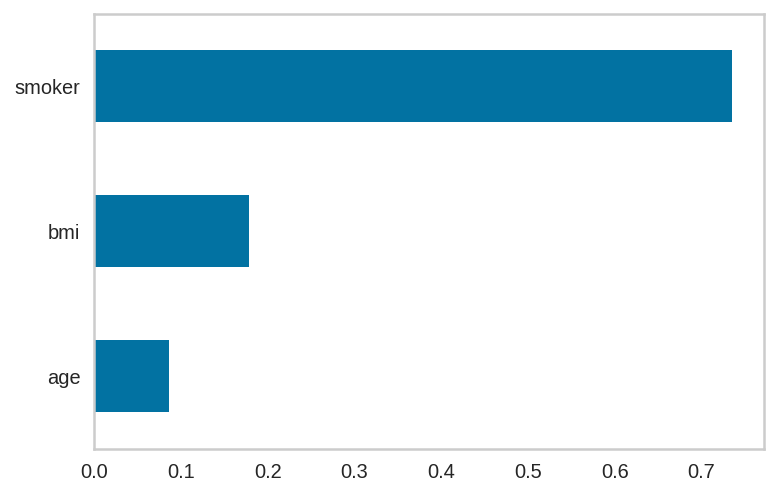

In [ ]:
# This line of code plot the feature importance as ranked by the
# Random Forest Regressor
pd.Series(rForest_reg.feature_importances_, index=X.columns).nlargest(4).plot(kind='barh').invert_yaxis()

In [ ]:
#fig_prediction = make_subplots(rows = 1, cols = 3, shared_yaxes = True, subplot_titles = (("Linear (R² = %.4f)" %score), 
#                                                 ("Polynomial (R² = %.4f)" %rsq_poly),  
#                                                 ("RFR (R² = %.4f)" %rsq_rfr)))

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

fig_prediction = make_subplots(rows = 1, cols = 2, shared_yaxes = True, subplot_titles = (("Linear (R² = %.4f)" %score),   
                                                 ("RFR (R² = %.4f)" %score_rf)))
fig_prediction.add_trace(go.Scatter(x = y_test, 
                                    y = y_test, 
                                    marker_color = '#3da4ff', 
                                    name = 'Perfect Prediction'),
                         row = 1, col = 1)
fig_prediction.add_trace(go.Scatter(x = y_test, 
                                    y = linear_predictions, 
                                    marker_color = '#ff3e3b', 
                                    mode = 'markers', 
                                    name = 'Predictions'),
                         row = 1, col =1)

fig_prediction.add_trace(go.Scatter(x = y_test, 
                                    y = y_test, 
                                    marker_color = '#3da4ff', 
                                    name = 'Perfect Prediction',
                                    showlegend = False),
                         row = 1, col =2)
fig_prediction.add_trace(go.Scatter(x = y_test, 
                                    y = rF_predictions, 
                                    marker_color = '#ff3e3b', 
                                    mode = 'markers', 
                                    name = 'Predictions', 
                                    showlegend = False),
                         row = 1, col = 2)


fig_prediction.update_layout(
    xaxis_title_text = 'Actual Value',
    yaxis_title_text = 'Predicted Value',
    #template = 'plotly_dark',
    width = 1000, 
    height = 375
)

fig_prediction.show()

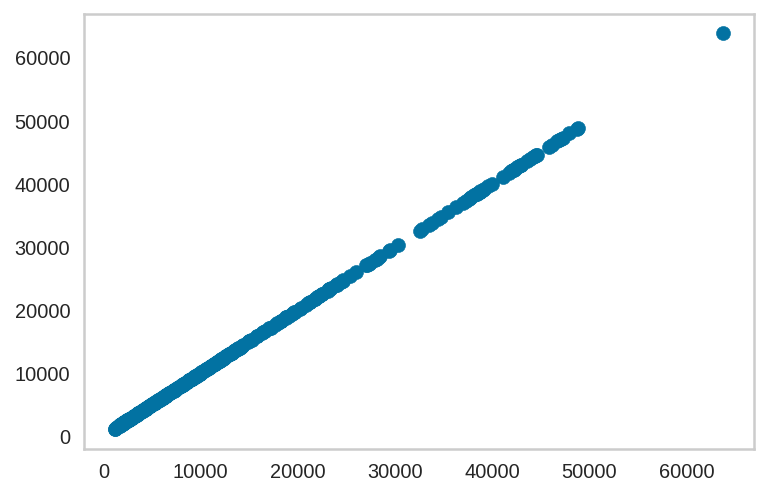

In [ ]:
plt.scatter(x = y_test, y = y_test)

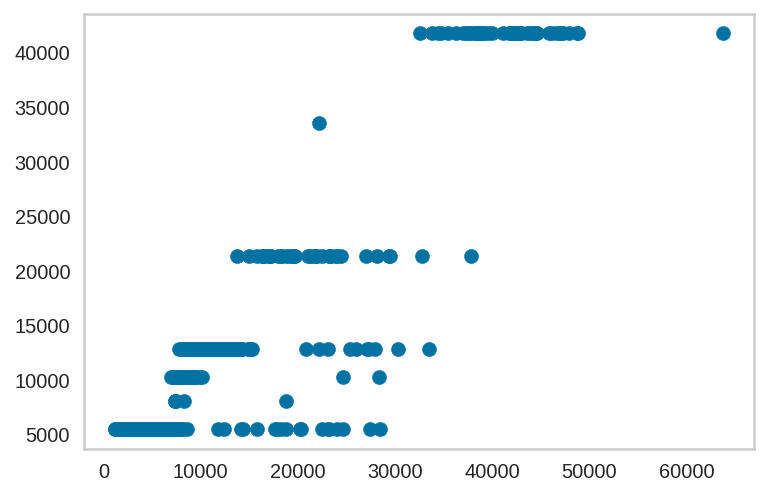

In [ ]:
plt.scatter(x = y_test, y = rF_predictions)

In [ ]:
from sklearn import datasets, ensemble
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

gb_reg = ensemble.GradientBoostingRegressor(**params)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gb_predictions = gb_reg.predict(X_test)

In [ ]:
gb_score = r2_score(y_test, gb_predictions)
print("R^2 Score of Gradient Boosting Regression ", gb_score)

R^2 Score of Gradient Boosting Regression  0.8531272523182787


In [ ]:
# This line of code evaluate the Random Forest Regressor Model's performance using RMSE
# and prints the RMSE
mse_gb = mean_squared_error(y_test, gb_predictions)
rmse_gb = np.sqrt(mse_gb)
rmse_gb

(21523416.271827172, 4639.333602127268)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_gb = mean_absolute_error(y_test, gb_predictions)
mae_gb

2614.660149617698

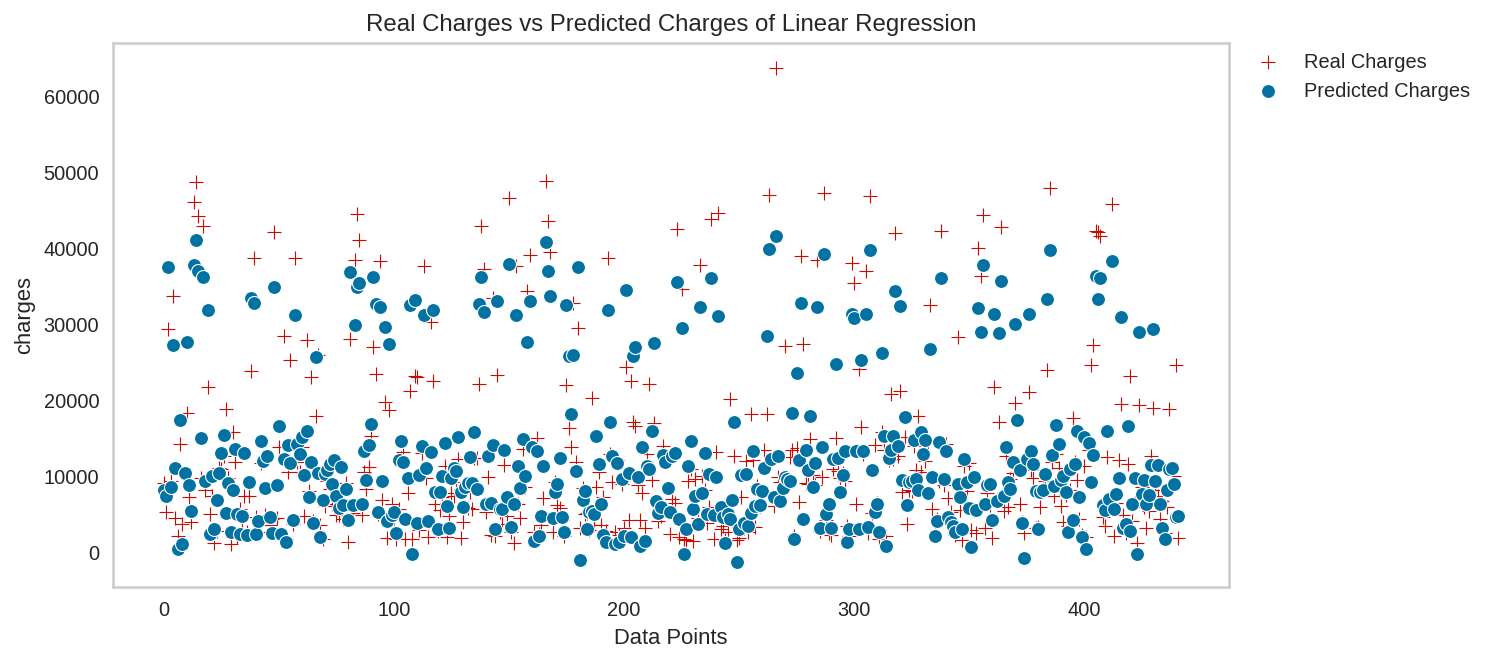

In [ ]:
poly_model_graph = pd.DataFrame({"y_test":y_test.ravel(),"linear_predictions":linear_predictions.ravel()})
plt.figure(figsize=(10,5))
sns.scatterplot(x=poly_model_graph.index,y=poly_model_graph.y_test,marker='+', color='r', label='Real Charges')
sns.scatterplot(x=poly_model_graph.index,y=poly_model_graph.linear_predictions, marker='o', label='Predicted Charges')
#plt.plot(poly_model_graph.index[:100],poly_model_graph.linear_predictions[:100])
plt.xlabel("Data Points")
plt.ylabel("charges")
plt.title("Real Charges vs Predicted Charges of Linear Regression")
plt.legend(loc=(1.01,0.88))
plt.show()

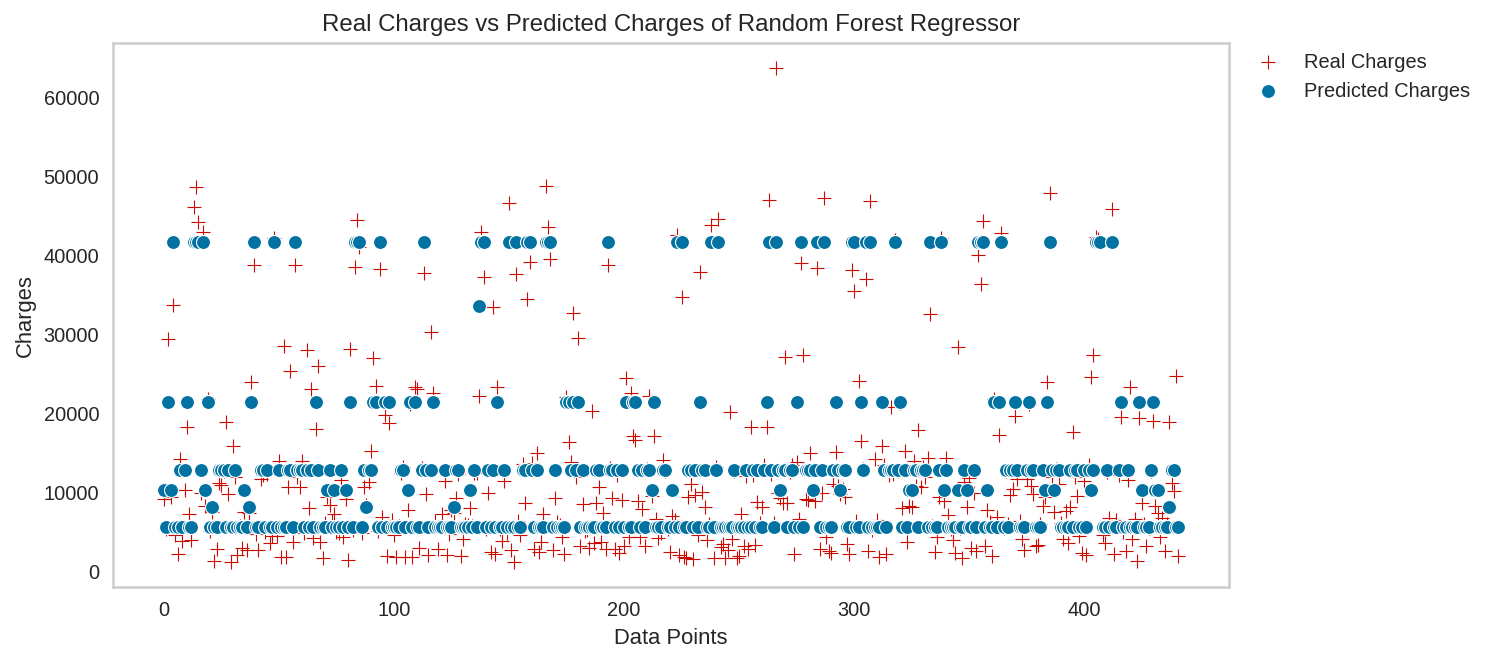

In [ ]:
poly_model_graph = pd.DataFrame({"y_test":y_test.ravel(),"RF_predictions":rF_predictions.ravel()})
plt.figure(figsize=(10,5))
sns.scatterplot(x=poly_model_graph.index,y=poly_model_graph.y_test,marker='+', color='r', label='Real Charges')
sns.scatterplot(x=poly_model_graph.index,y=poly_model_graph.RF_predictions,marker='o', label='Predicted Charges')
plt.xlabel("Data Points")
plt.ylabel("Charges")
plt.title("Real Charges vs Predicted Charges of Random Forest Regressor")
plt.legend(loc=(1.01,0.88))
plt.show()

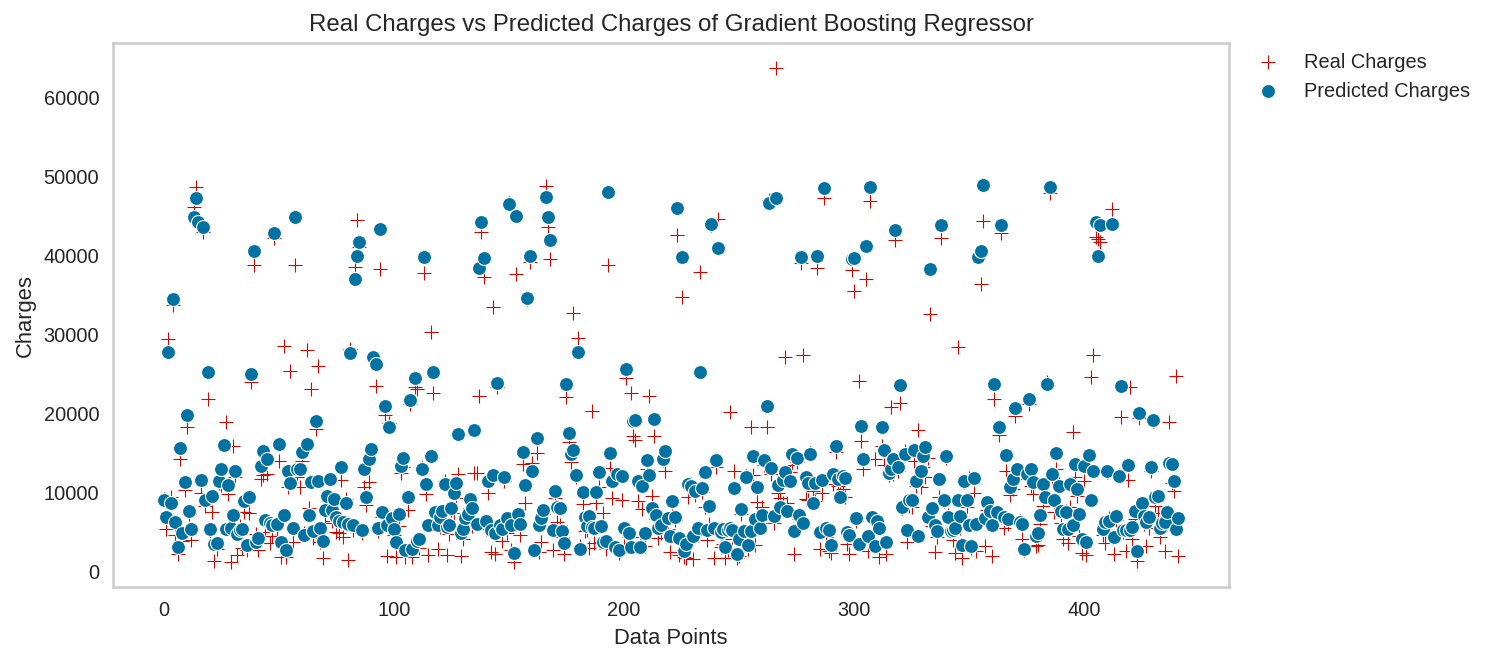

In [ ]:
poly_model_graph = pd.DataFrame({"y_test":y_test.ravel(),"Gb_predictions":gb_predictions.ravel()})
plt.figure(figsize=(10,5))
sns.scatterplot(x=poly_model_graph.index,y=poly_model_graph.y_test, marker='+', color='r', label='Real Charges')
sns.scatterplot(x=poly_model_graph.index,y=poly_model_graph.Gb_predictions,marker='o', label='Predicted Charges')
plt.xlabel("Data Points")
plt.ylabel("Charges")
plt.title("Real Charges vs Predicted Charges of Gradient Boosting Regressor")
plt.legend(loc=(1.01,0.88))
plt.show()

In [ ]:
compare = pd.DataFrame({'Predicted Charges': linear_predictions, 'Real Charges' : y_test})
compare.head(10)

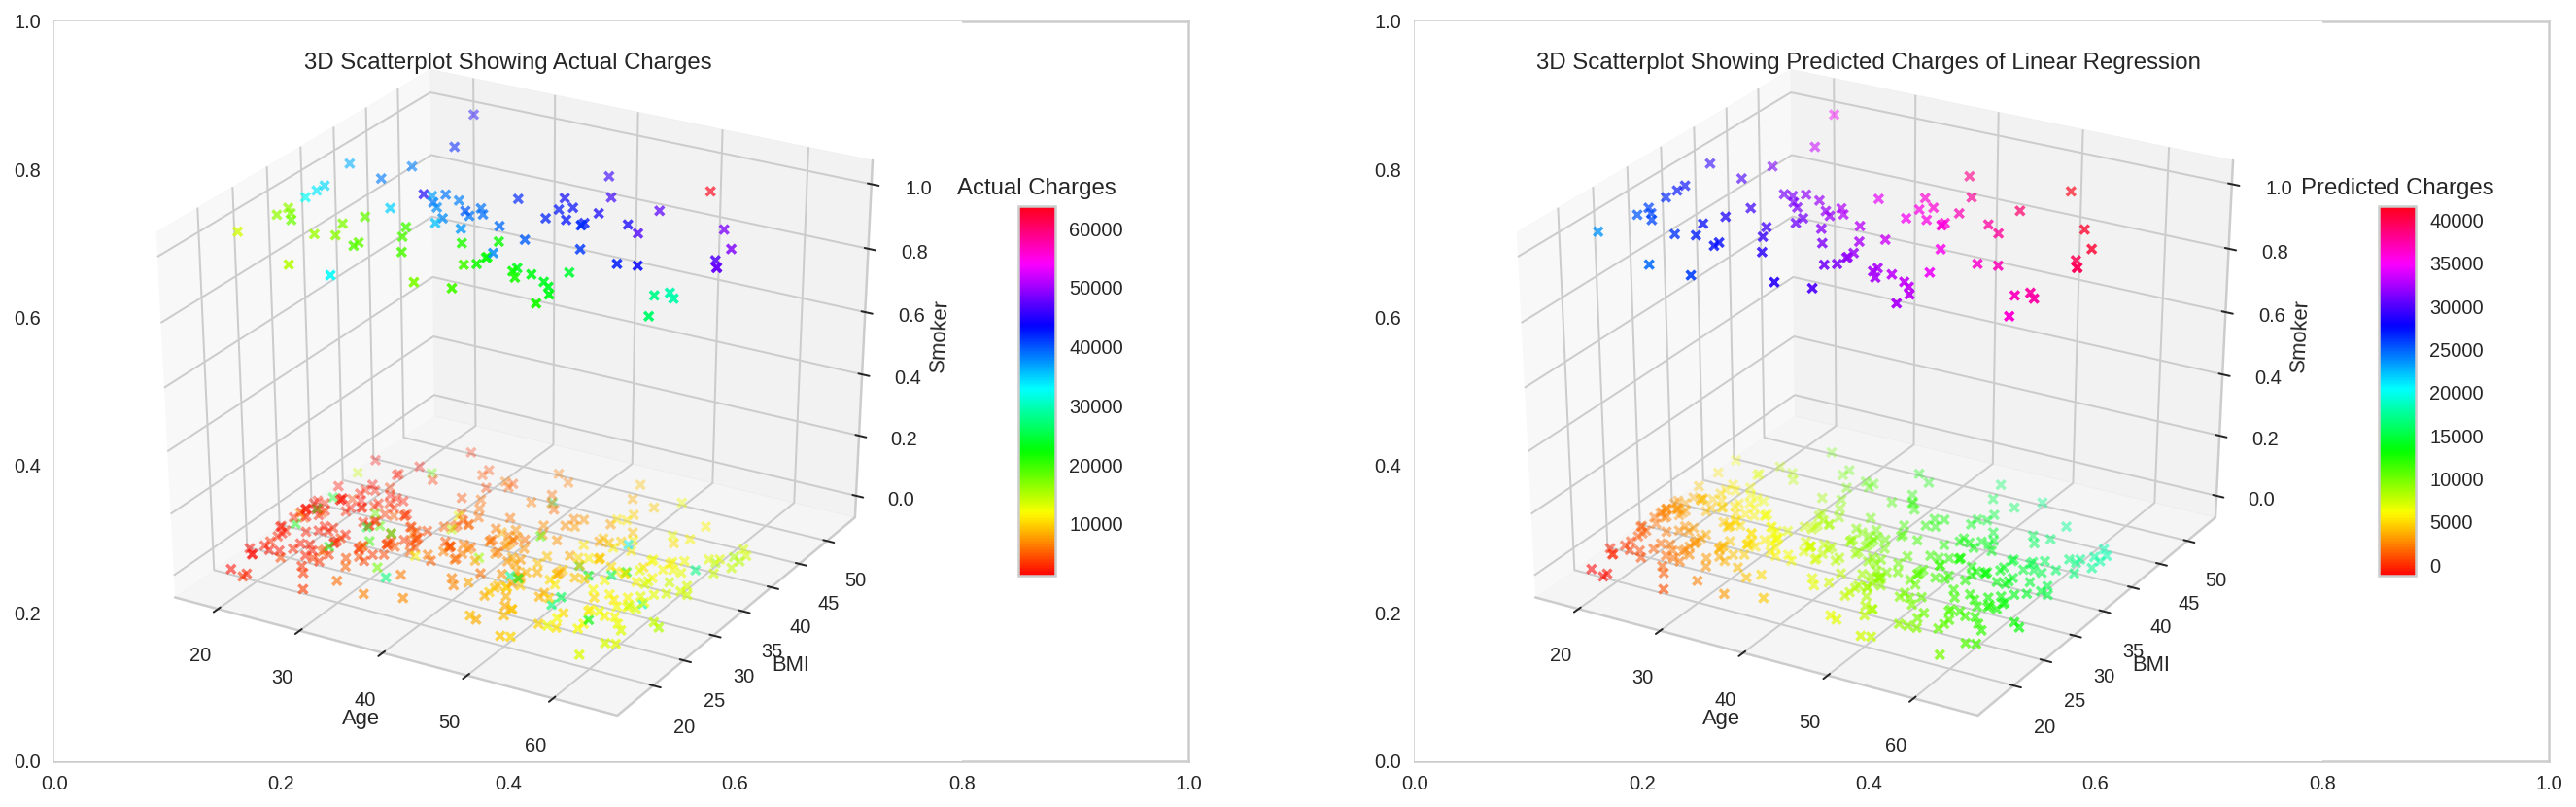

In [ ]:
from mpl_toolkits import mplot3d
#fig (ax1, ax2)= plt.figure(figsize = (12,9))
#ax = fig.add_subplot(111, projection='3d')
fig, (ax1, ax2)= plt.subplots(figsize = (23,7), ncols=2)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

x =X_test['age'].values
y =X_test['bmi'].values
z =X_test['smoker'].values

my_cmap = plt.get_cmap('hsv')


scat1 = ax1.scatter3D(x, y, z, c=y_test, cmap = my_cmap, marker='x')
ax1.set_xlabel('Age')
ax1.set_ylabel('BMI')
ax1.set_zlabel('Smoker')
color_b1 = fig.colorbar(scat1, ax = ax1, shrink = 0.5, aspect = 10)
color_b1.ax.set_title('Actual Charges')
ax1.set_title('3D Scatterplot Showing Actual Charges') 

scat2 = ax2.scatter3D(x, y, z, c=linear_predictions, cmap = my_cmap, marker='x')
ax2.set_xlabel('Age')
ax2.set_ylabel('BMI')
ax2.set_zlabel('Smoker')
color_b2 = fig.colorbar(scat2, ax = ax2, shrink = 0.5, aspect = 10)
color_b2.ax.set_title('Predicted Charges')
#ax.legend()
ax2.set_title('3D Scatterplot Showing Predicted Charges of Linear Regression')
plt.show()

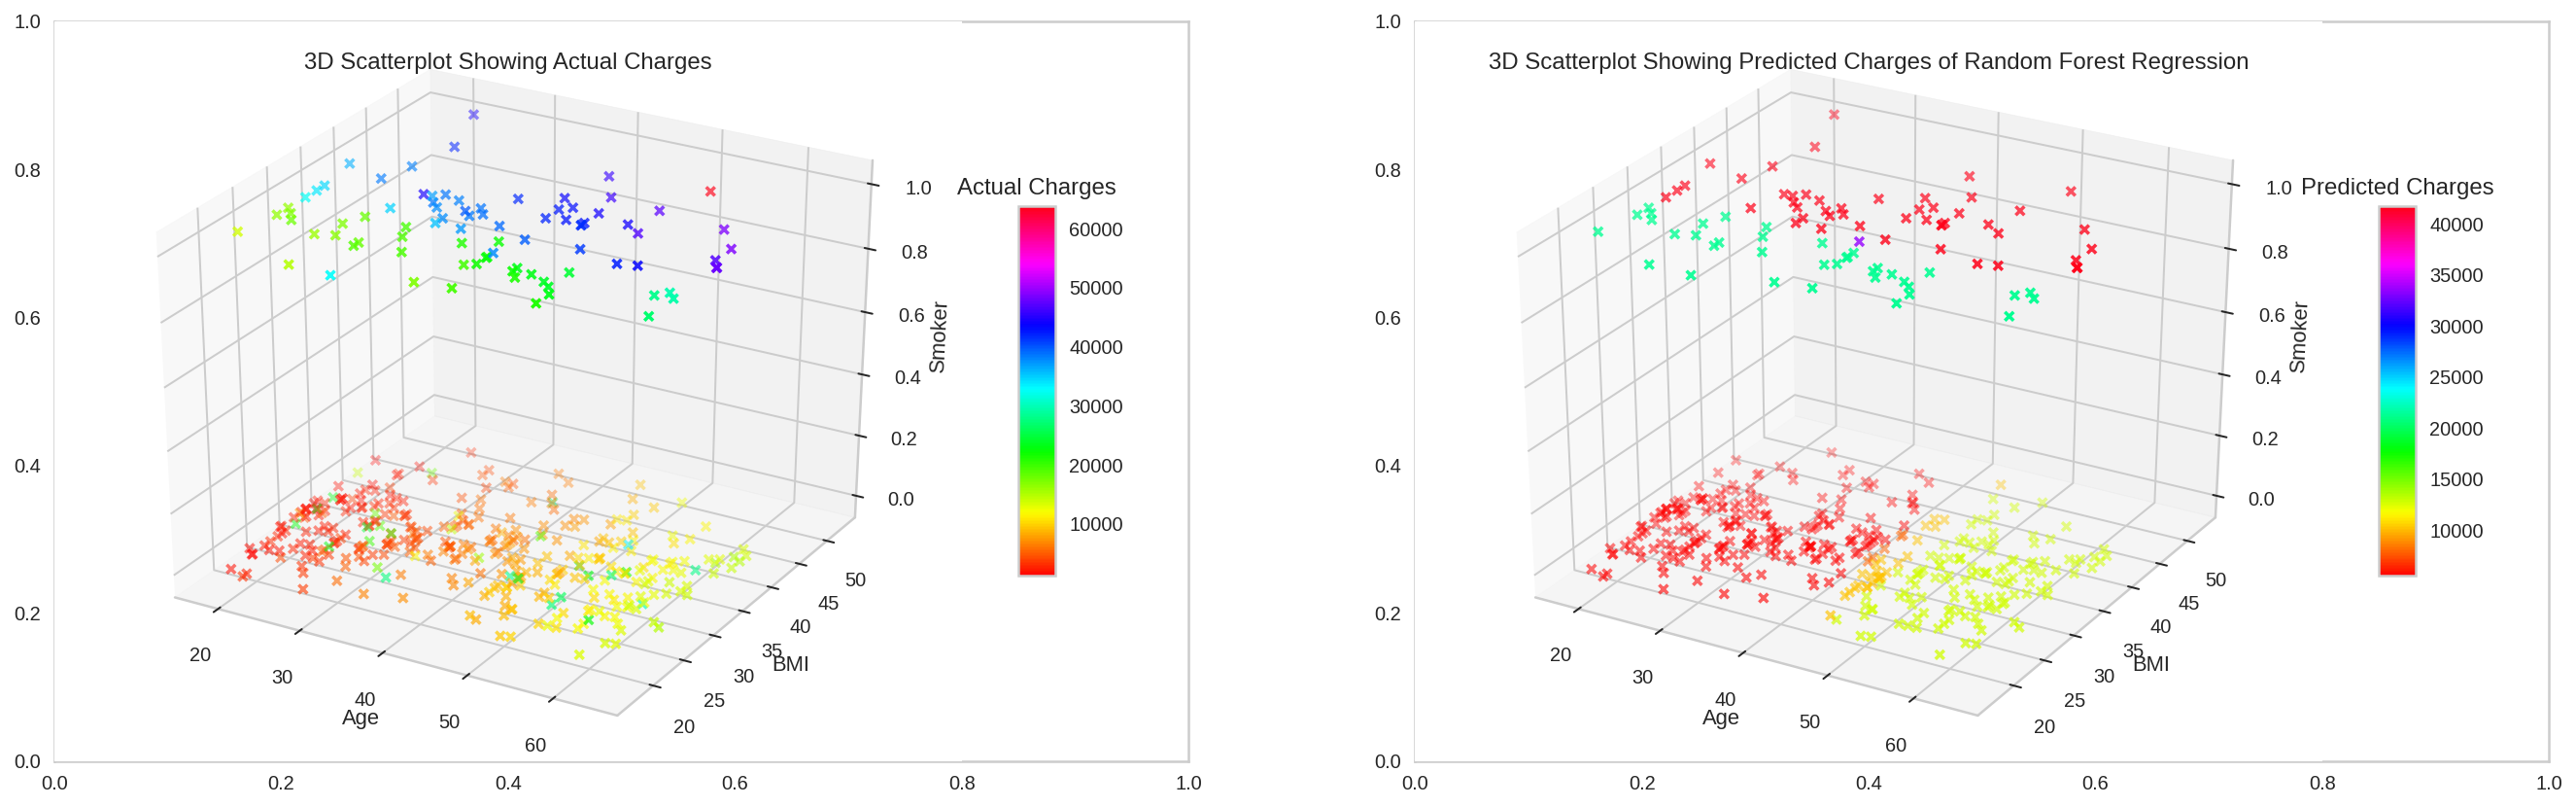

In [ ]:
from mpl_toolkits import mplot3d
#fig (ax1, ax2)= plt.figure(figsize = (12,9))
#ax = fig.add_subplot(111, projection='3d')
fig, (ax3, ax4)= plt.subplots(figsize = (23,7), ncols=2)
ax3 = fig.add_subplot(1, 2, 1, projection='3d')
ax4 = fig.add_subplot(1, 2, 2, projection='3d')

x =X_test['age'].values
y =X_test['bmi'].values
z =X_test['smoker'].values

my_cmap = plt.get_cmap('hsv')


scat3 = ax3.scatter3D(x, y, z, c=y_test, cmap = my_cmap, marker='x')
ax3.set_xlabel('Age')
ax3.set_ylabel('BMI')
ax3.set_zlabel('Smoker')
color_b3 = fig.colorbar(scat3, ax = ax3, shrink = 0.5, aspect = 10)
color_b3.ax.set_title('Actual Charges')
ax3.set_title('3D Scatterplot Showing Actual Charges') 

scat4 = ax4.scatter3D(x, y, z, c=rF_predictions, cmap = my_cmap, marker='x')
ax4.set_xlabel('Age')
ax4.set_ylabel('BMI')
ax4.set_zlabel('Smoker')
color_b4 = fig.colorbar(scat4, ax = ax4, shrink = 0.5, aspect = 10)
color_b4.ax.set_title('Predicted Charges')
#ax.legend()
ax4.set_title('3D Scatterplot Showing Predicted Charges of Random Forest Regression')
plt.show()

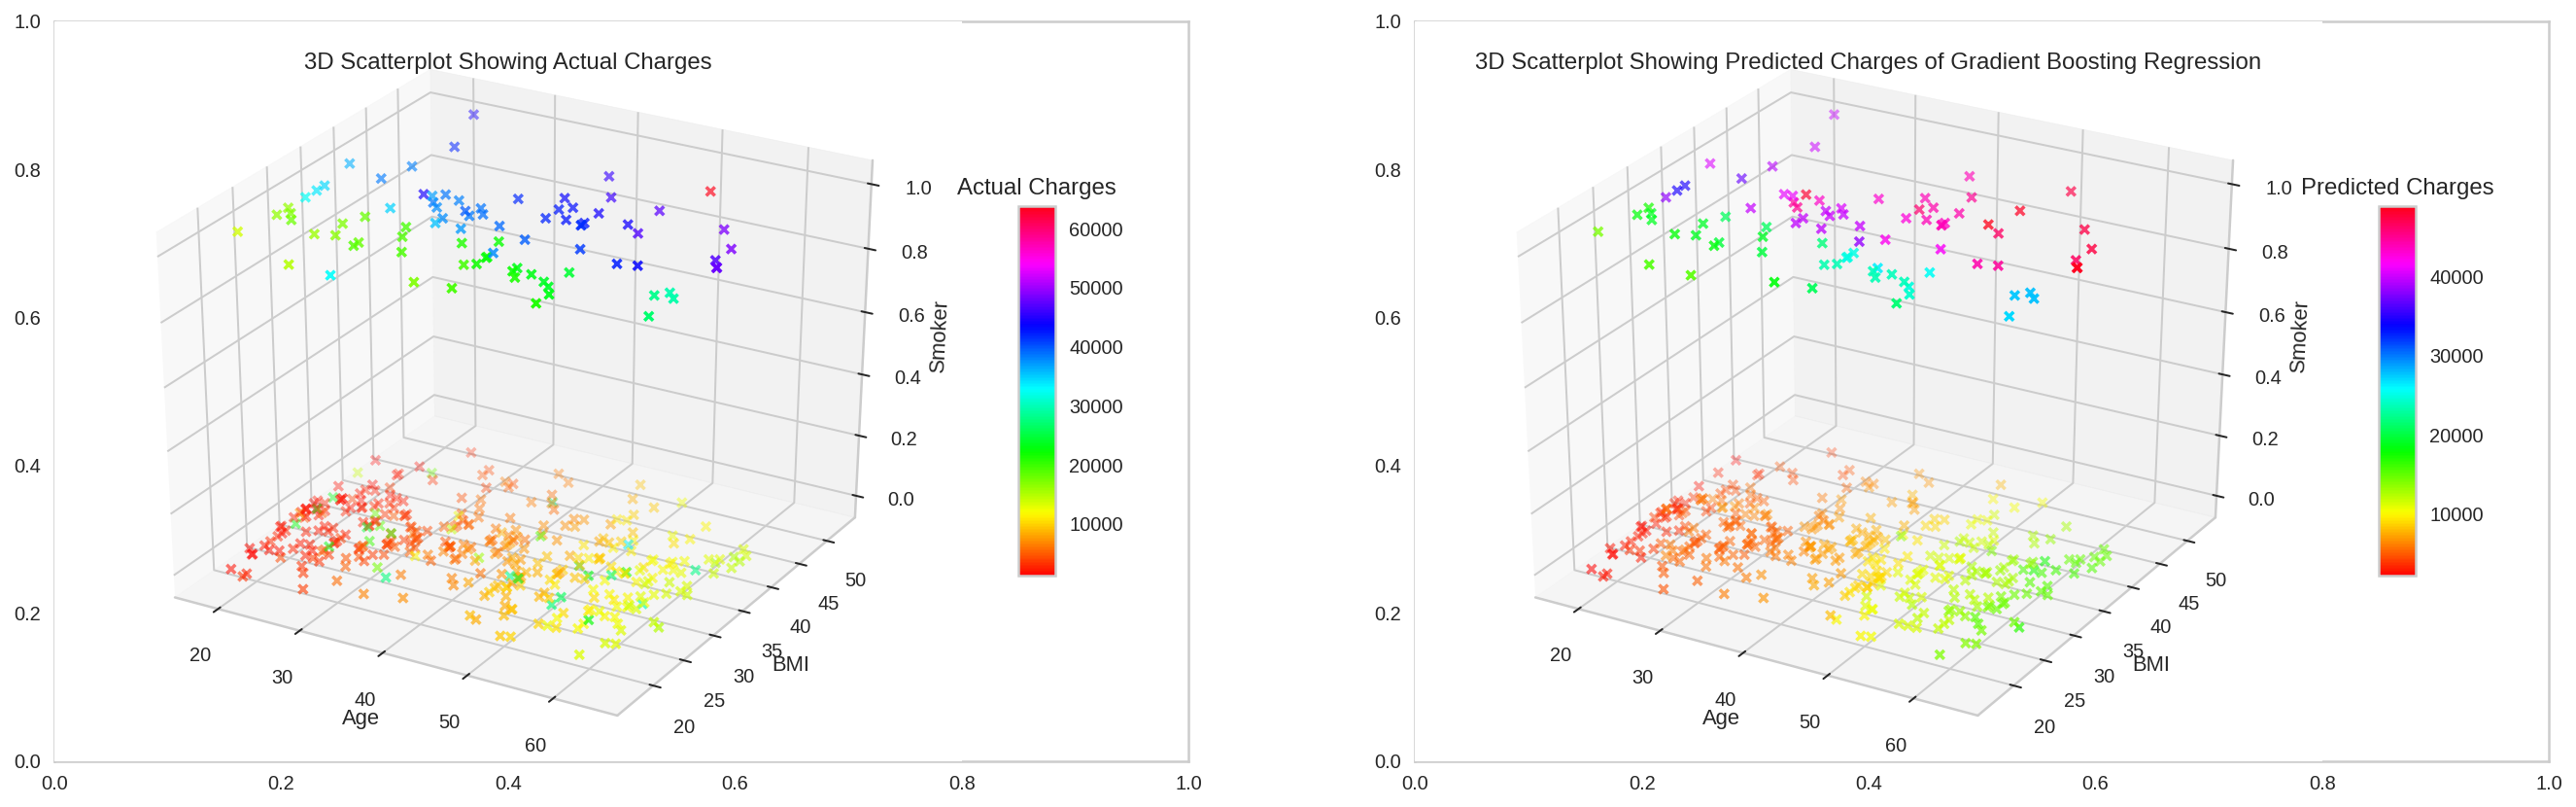

In [ ]:
from mpl_toolkits import mplot3d
#fig (ax1, ax2)= plt.figure(figsize = (12,9))
#ax = fig.add_subplot(111, projection='3d')
fig, (ax5, ax6)= plt.subplots(figsize = (23,7), ncols=2)
ax5 = fig.add_subplot(1, 2, 1, projection='3d')
ax6 = fig.add_subplot(1, 2, 2, projection='3d')

x =X_test['age'].values
y =X_test['bmi'].values
z =X_test['smoker'].values

my_cmap = plt.get_cmap('hsv')


scat5 = ax5.scatter3D(x, y, z, c=y_test, cmap = my_cmap, marker='x')
ax5.set_xlabel('Age')
ax5.set_ylabel('BMI')
ax5.set_zlabel('Smoker')
color_b5 = fig.colorbar(scat1, ax = ax5, shrink = 0.5, aspect = 10)
color_b5.ax.set_title('Actual Charges')
ax5.set_title('3D Scatterplot Showing Actual Charges') 

scat6 = ax6.scatter3D(x, y, z, c=gb_predictions, cmap = my_cmap, marker='x')
ax6.set_xlabel('Age')
ax6.set_ylabel('BMI')
ax6.set_zlabel('Smoker')
color_b6 = fig.colorbar(scat6, ax = ax6, shrink = 0.5, aspect = 10)
color_b6.ax.set_title('Predicted Charges')
#ax.legend()
ax6.set_title('3D Scatterplot Showing Predicted Charges of Gradient Boosting Regression')
plt.show()

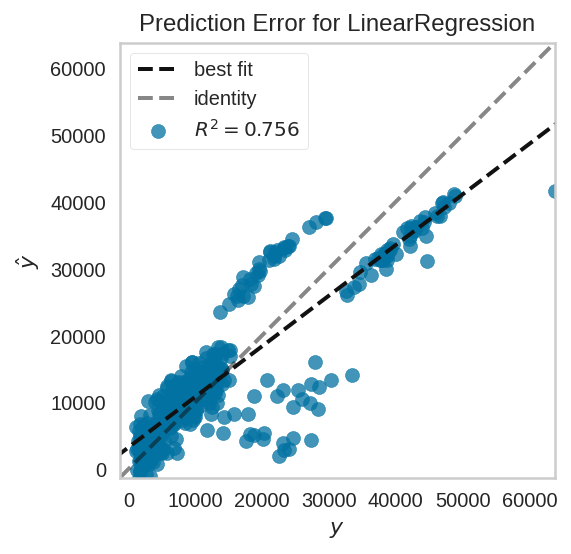

In [ ]:
from yellowbrick.regressor import prediction_error

model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Finalize and render the figure

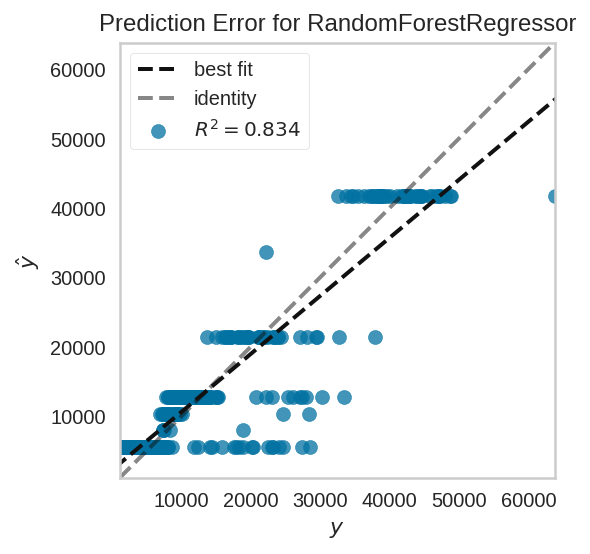

In [ ]:
from yellowbrick.regressor import prediction_error

model_rF = RandomForestRegressor(n_estimators=20, max_depth=2, random_state=0)
visualizer = PredictionError(model_rF)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

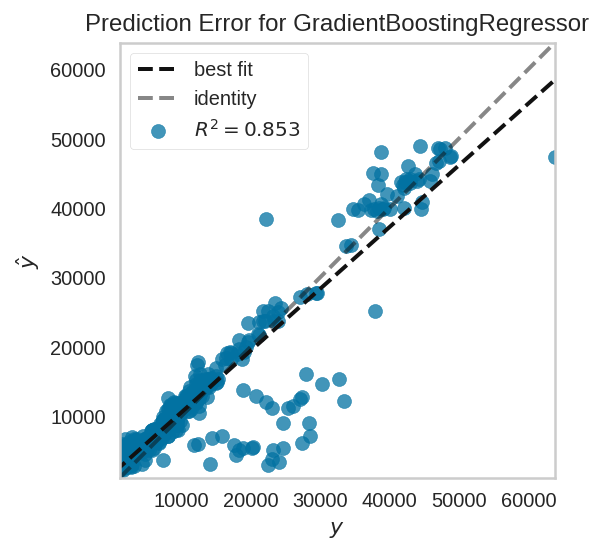

In [ ]:
from yellowbrick.regressor import prediction_error

model_gB = ensemble.GradientBoostingRegressor(**params)
visualizer = PredictionError(model_gB)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 